In [56]:
# IMPORTING THE REQUIRED LIBRARIES

%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff

In [82]:
# DATA EXPLORATION BEGINS HERE
## Read file
data = pd.read_csv("googleplaystore.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [59]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [60]:
#Total No. of Apps in our DataSet
print(len(data))

print(data.shape)

10841
(10841, 13)


In [61]:
#Deleting Duplicate Apps
data.drop_duplicates(subset='App', inplace=True)
data = data[data['Android Ver'] != np.nan]
data = data[data['Android Ver'] != 'NaN']
data = data[data['Installs'] != 'Free']
data = data[data['Installs'] != 'Paid']
print(len(data))
# Total apps after deleting duplicates
print(data.shape)

9659
(9659, 13)


In [62]:
#Displaying all the Categories of Apps
cat = data.Category.unique()
print(cat)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


<AxesSubplot:xlabel='Category'>

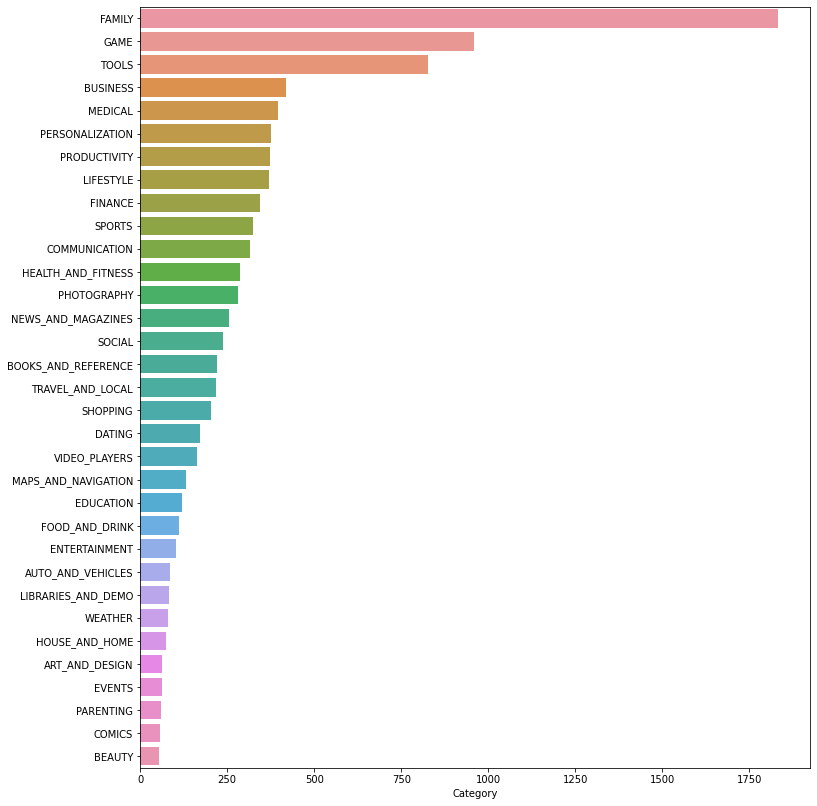

In [64]:
# Using Seaborn to plot a Bar Graph Representing No. Apps in Each Category
plt.figure(figsize=(12, 14))
most_cat = data.Category.value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=data)

In [65]:
""" 
Android market breakdown
Which category has the highest share of (active) apps in the market? """
# This is another way of representing the above data in a Pie Graph using Plotly
number_of_apps_in_category = data['Category'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
)]

plotly.offline.iplot(data, filename='active_category')

""" 
Observations :
Family and Game apps have the highest market prevelance.
Interestingly, Tools, Business and Medical apps are also catching up. 
"""

' \nObservations :\nFamily and Game apps have the highest market prevelance.\nInterestingly, Tools, Business and Medical apps are also catching up. \n'

In [83]:
# Displaying all the differernt Ratings
data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [105]:
# Here, we can see there is a rating of '19.' which is not possible, So we will replace it with '1.9'
data['Rating'].replace(to_replace=[19.0], value=[1.9],inplace=True)
data.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [85]:
# We need to convert the certain columns from 'object' to numeric. So that plotting graphs becomes easier
data['Rating'] = pd.to_numeric(data['Rating'],errors='coerce')

In [86]:
# Displaying the values in column "INSTALL"
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [90]:
# Here, we need to Remove '+' and ',' and convert its dtype to numeric
data['Installs'] = data['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: x.replace('Free', '0') if 'Free' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: int(x))
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [103]:
# Displaying the values in column "Size"
data['Size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01,      nan,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e

In [102]:
# Here, The sizes will be converted into Kilobytes. Those of which are equal to 'Varies with device' will be turned into 'NaN', because it may cause false fluctuations in Visualization.
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

data['Size'] = data['Size'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') * 1000 if 'M' in str(x) else x)

data['Size'] = data['Size'].apply(lambda x: int(x))

data['Size'].unique()

ValueError: cannot convert float NaN to integer